# Approximation

Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

Апроксимация функции многочленном n-ой степени

In [42]:
%matplotlib inline
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

Функция

In [41]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(- x / 2.)

Аппроксимирующий многочлен

In [25]:
def f_w(w, x):
    s = 0
    for i in range(len(w)):
        s += w[i] * (x ** i)
    return s

Функция определения весов через решение системы линейных уравнений

In [34]:
def get_w(x):
    n = len(x)
    b = f(x)

    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i][j] = x[i]**j

    w = scipy.linalg.solve(A, b)
    return w

Построение графиков с разным количеством определяющих точек

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


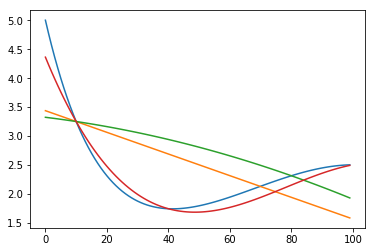

In [37]:
x2 = np.array([1, 15])
x3 = np.array([1, 8, 15])
x4 = np.array([1, 4, 10, 15])

x = np.arange(0, 10, 0.1)

plt.plot(f(x))

plt.plot(f_w(get_w(x2), x))
plt.plot(f_w(get_w(x3), x))
plt.plot(f_w(get_w(x4), x))

plt.show()

In [39]:
w = get_w(x4)
for i in w:
    print(round(i, 2), end=" ")

4.36 -1.3 0.19 -0.01 